# Installing and Importing Relevant Packages

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.5.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 28.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
import random
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import torch_geometric as torch_geometric
import math

import torch_geometric.nn as pyg_nn
import torch_geometric.utils as pyg_utils

import time
from datetime import datetime

import networkx as nx
import numpy as np
import torch
import torch.optim as optim
import numpy as np

from torch_geometric.datasets import TUDataset
from torch_geometric.datasets import Planetoid
from torch_geometric.data import Data, DataLoader

import torch_geometric.transforms as T

#from tensorboardX import SummaryWriter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv,GINConv
from torch.distributions import Bernoulli,Categorical
import matplotlib.cm as cmx

# Code to Generate the Dataset

In [ ]:
dataset=[]

First we generate lollipop graphs and label them as 1




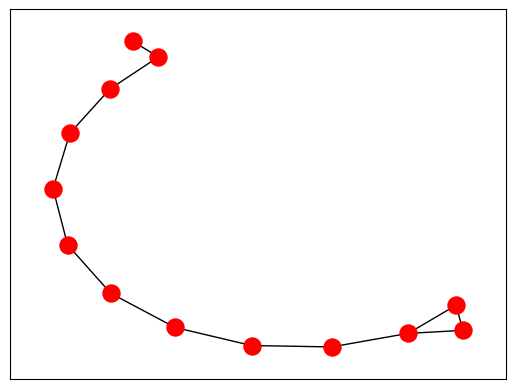

In [ ]:
num_node_features=1
count1=0
totalnode=0
for numdata in range(100):
  range1=random.randint(2,5)
  range2=random.randint(7,15)
  m=[i for i in range(range1)]
  n=[i for i in range(range1,range2)]
  Cycle = nx.lollipop_graph(m,n)
  num_nodes=nx.number_of_nodes(Cycle)
  totalnode+=num_nodes

  y=np.ones(num_nodes)

  #Cycle.add_nodes_from([i in range(0,100)])
  #p=math.ceil(random.uniform(5,8))








  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)

  data.y=1
  x=torch.ones(num_nodes,1)
  x=x.float()

  #print(deg.shape)

  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=x
  dataset.append(data)
nx.draw_networkx(Cycle, node_size=150, node_color='red',with_labels=False)

Next we generate trees and label them as 0

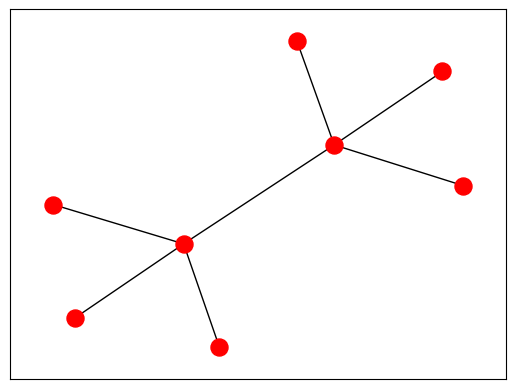

In [ ]:
num_node_features=1
count1=0
totalnode=0
for numdata in range(100):
  num_nodes=random.randint(3,10)
  totalnode+=num_nodes

  y=np.ones(num_nodes)

  #Cycle.add_nodes_from([i in range(0,100)])
  p=math.ceil(random.uniform(2,4))
  Cycle = nx.full_rary_tree(p,num_nodes)
  #Cycle=nx.wheel_graph(num_nodes)







  data=pyg_utils.from_networkx(Cycle)
  count1+=np.count_nonzero(y)

  #print(y)

  data.y=0
  x=torch.ones(num_nodes,1)
  x=x.float()

  #print(deg.shape)

  #x = torch.randint(low=5,high=10,size=(num_nodes, num_node_features), dtype=torch.float32)
  data.x=x
  dataset.append(data)
nx.draw_networkx(Cycle, node_size=150, node_color='red',with_labels=False)

# Code to Load/Save Dataset

In [ ]:
import torch

# Example list of tensors (replace this with your actual dataset)
#my_dataset = [torch.randn((3, 64, 64)) for _ in range(100)]

# Define the path to the local folder on Colab where you want to save the dataset
save_path_dataset = '/content/my_dataset1.pt'

# Save the dataset (list of tensors)
torch.save(dataset, save_path_dataset)



In [ ]:
#Code for loading saved dataset


# Define the path to the saved dataset on your local machine


# Define the path to the saved dataset on your local machine
load_path_dataset = '/content/loltreedataset.pt'

# Load the saved dataset (list of tensors)
loaded_dataset = torch.load(load_path_dataset)


# Load the saved dataset (list of tensors)
loaded_dataset = torch.load(load_path_dataset)
dataset=loaded_dataset


# Train-Test Split

Split into train-test

In [ ]:
torch.manual_seed(12345)
random.shuffle(dataset)

train_dataset = dataset[:150]
test_dataset = dataset[150:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 150
Number of test graphs: 50


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data.x)
    print()

Step 1:
Number of graphs in the current batch: 64
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


# Definition and Training of the Classifier Model

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class GCNEncoder(torch.nn.Module):
    def __init__(self, inputdim,hidden_channels):
        super(GCNEncoder, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(inputdim, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.bn = torch.nn.BatchNorm1d(hidden_channels)
        self.dropout = torch.nn.Dropout(0.5)
        self.leaky_relu = torch.nn.LeakyReLU(0.2)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = self.leaky_relu(x)
        x = self.conv2(x, edge_index)
        x = self.leaky_relu(x)
        x = self.conv3(x, edge_index)

        x = global_mean_pool(x, batch)
        x = self.bn(x)
        x = F.dropout(x, p=0.5, training=self.training)
        return x

class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LinearClassifier, self).__init__()
        self.linear = Linear(input_dim, num_classes)

    def forward(self, x):
        return self.linear(x)
class CombinedModel(torch.nn.Module):
    def __init__(self,inputdim, hidden_channels, num_classes):
        super(CombinedModel, self).__init__()
        self.encoder = GCNEncoder(inputdim,hidden_channels)
        self.classifier = LinearClassifier(input_dim=hidden_channels, num_classes=num_classes)

    def forward(self, x, edge_index, batch):
        # Get the embeddings from the encoder
        embeddings = self.encoder(x, edge_index, batch)

        # Get the logits from the classifier
        logits = self.classifier(embeddings)

        return embeddings, logits
num_features=1
inputdim=num_features
model=CombinedModel(inputdim, hidden_channels=64,num_classes=2)


In [ ]:

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Add a learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

def train():
    model.train()

    for epoch in range(num_epochs):
        for data in train_loader:  # Iterate in batches over the training dataset.
            embedding,  out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
            #print(out)
            loss = criterion(out, data.y)  # Compute the loss.
            loss.backward()  # Derive gradients.
            optimizer.step()  # Update parameters based on gradients.
            optimizer.zero_grad()  # Clear gradients.

        # Update the learning rate scheduler
        scheduler.step()

        # Print the current learning rate every epoch (optional)
        print(f"Epoch {epoch + 1}/{num_epochs}, Learning Rate: {scheduler.get_last_lr()[0]}",loss)
        # train_acc = test(train_loader)
        # test_acc = test(test_loader)
        # print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Set the number of epochs
num_epochs = 300

# Call the training loop
train()



Epoch 1/300, Learning Rate: 0.01 tensor(0.1770, grad_fn=<NllLossBackward0>)
Epoch 2/300, Learning Rate: 0.01 tensor(0.7995, grad_fn=<NllLossBackward0>)
Epoch 3/300, Learning Rate: 0.01 tensor(0.2311, grad_fn=<NllLossBackward0>)
Epoch 4/300, Learning Rate: 0.01 tensor(0.1156, grad_fn=<NllLossBackward0>)
Epoch 5/300, Learning Rate: 0.01 tensor(0.1981, grad_fn=<NllLossBackward0>)
Epoch 6/300, Learning Rate: 0.01 tensor(0.1844, grad_fn=<NllLossBackward0>)
Epoch 7/300, Learning Rate: 0.01 tensor(0.0411, grad_fn=<NllLossBackward0>)
Epoch 8/300, Learning Rate: 0.01 tensor(0.1450, grad_fn=<NllLossBackward0>)
Epoch 9/300, Learning Rate: 0.01 tensor(0.1347, grad_fn=<NllLossBackward0>)
Epoch 10/300, Learning Rate: 0.01 tensor(0.4096, grad_fn=<NllLossBackward0>)
Epoch 11/300, Learning Rate: 0.01 tensor(0.1092, grad_fn=<NllLossBackward0>)
Epoch 12/300, Learning Rate: 0.01 tensor(0.1643, grad_fn=<NllLossBackward0>)
Epoch 13/300, Learning Rate: 0.01 tensor(0.3475, grad_fn=<NllLossBackward0>)
Epoch 14

# Plotting the Confusion Matrix of the Classifier

In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, dataset, class_dict):
    """
    Evaluate the model on the provided dataset, compute the confusion matrix,
    and plot it with class names.

    Parameters:
    - model: Trained GNN model
    - dataset: List of data objects
    - class_dict: Dictionary mapping class labels to class names, e.g., {0: 'Class A', 1: 'Class B'}
    """

    # Step 1: Evaluate the model and get predictions and true labels
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data in dataset:
            _, out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)
            #data.y=torch.tensor(data.y)
            all_preds.append(pred.numpy().flatten())
            all_labels.append(data.y.numpy().flatten())

    print(all_labels)
    print(all_preds)
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    # Step 2: Compute the confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # Step 3: Plot the confusion matrix
    class_names = [class_dict[i] for i in range(len(class_dict))]

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# Example usage:
# Assuming the class labels are {0: 'Mutagenic', 1: 'Non-Mutagenic'}
#class_dict = {0: 'Mutagenic', 1: 'Non-Mutagenic'}

# Example dataset (assuming it's a list of data objects)
# dataset = [...]

# Call the function with the model, dataset (as a list), and class dictionary
#plot_confusion_matrix(model, dataset, class_dict)


[array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), arr

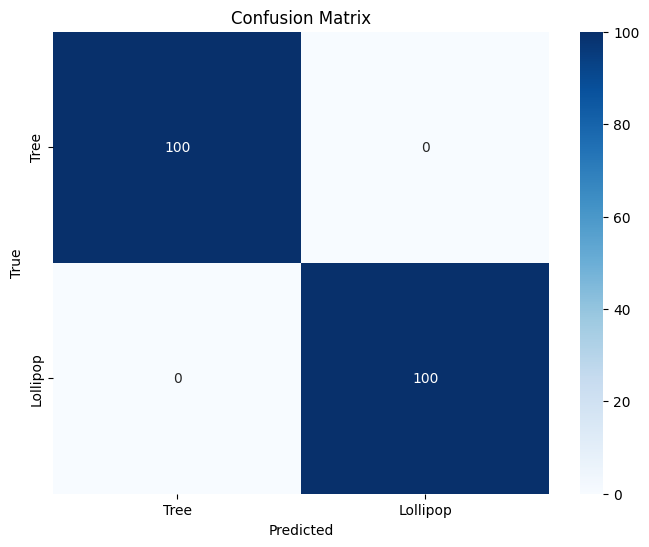

In [ ]:
class_dict={0:'Tree',1:'Lollipop'}
plot_confusion_matrix(model,dataset,class_dict)

In [ ]:
# model = ImprovedGCNWithMLP(hidden_channels=64, mlp_hidden_channels=128)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# criterion = torch.nn.CrossEntropyLoss()
# # Add a learning rate scheduler
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

# def train():
#     model.train()

#     for data in train_loader:  # Iterate in batches over the training dataset.


#         #  print(data.batch)
#         #  # Example troubleshooting steps
#         #  print("Number of nodes:", data.x.size(0))
#         #  print("Node indices in edge_index:", data.edge_index.max().item())
#         #  print("Node features shape:", data.x.shape)
#         #  print("Batch indices:", data.batch.max().item())

#          # Add more debugging information as needed

#          # Example troubleshooting steps


# # Add more debugging information as needed

#          out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
#          loss = criterion(out, data.y)  # Compute the loss.
#          loss.backward()  # Derive gradients.
#          optimizer.step()  # Update parameters based on gradients.
#          optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)
         #out=torch.cat(out,dim=0)
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.


# for epoch in range(1, 800):
#     train()

#     train_acc = test(train_loader)
#     test_acc = test(test_loader)
#     print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

In [ ]:


# Define the path to the local folder on Colab where you want to save the model
save_path = '/content/loltree.pth'

# Save the model
torch.save(model.state_dict(), save_path)


In [ ]:
from google.colab import files

# Zip the folder containing the model
!zip -r /content.zip /content

# Download the zipped folder
files.download('/content.zip')


In [1]:

load_path = '/content/loltree.pth'



# Initialize the model architecture

# Load the saved model weights
model.load_state_dict(torch.load(load_path))

# Set the model to evaluation mode
model.eval()


NameError: name 'model' is not defined

In [ ]:
data1=[]
data2=[]
latent_data1=[]
latent_data2=[]
for i in range(len(dataset)):
    model.eval()
    data=dataset[i]
    embedding , out = model(data.x, data.edge_index, data.batch)
    pred = out.argmax(dim=1)
    if(pred==0):
        data1.append(data)
        latent_data1.append(embedding)
    else:
        data2.append(data)
        latent_data2.append(embedding)

print(len(data1))
print(len(data2))

print(data.batch)

#latent_explanations=[]

100
100
None


In [ ]:
adjlist=[]

# Function to extract graphs labelled by classifier above the threshold confidence level

In [ ]:
def Dpc(dataset, threshold):
    data1 = []
    data2 = []

    m = torch.nn.Softmax(dim=1)

    for i in range(len(dataset)):
        model.eval()
        data = dataset[i]
        embedding, out = model(data.x, data.edge_index, data.batch)
        probs = m(out)

        if threshold < probs[0][0]:
            data1.append(data)
        if threshold < probs[0][1]:
            data2.append(data)


    return data1, data2


# Graph Representation Model

In [ ]:
from tqdm import tqdm
N=25
def GraphRepModel(targetclass,N):
  #N=25 # Number of nodes of the largest graph that the model can generate

  X=np.zeros((N,2))# Node Type Matrix for nodes of 10 types
  #targetclass=data2
  print("length of target class",len(targetclass))

  #Learning the node representations
  for i in tqdm(range(len(targetclass))):#len(data1))
      data=targetclass[i]
      x=data.x
      x=np.array(x,dtype=int)

      #print(x)
      for j in range(len(x)):
          X[j][x[j]]+=1
      for k in range(j+1,N):
          X[k][0]+=1


  #Learning the edge representations
  Adj=np.zeros((N,N))# Edge type count for only two types edge present/edge absent
  for i in tqdm(range(len(targetclass))):
      data=targetclass[i]
      adj=data.edge_index
      rowlen=len(adj[0][:])
      #print(rowlen)
      #print(adj[:][0])
      #print(adj[:][1])
      for j in range(rowlen):
          k1=adj[0][j]
          k2=adj[1][j]
          Adj[k1][k2]+=1
          #Adj[k2][k1]+=1

  #Learning the parameters for the distribution of nodes
  numgraphs=len(targetclass)
  print(numgraphs)
  X=X/numgraphs #converting X to the node distribution matrix

  Adj=Adj/numgraphs
  return X , Adj

length of target class 100


100%|██████████| 100/100 [00:00<00:00, 1772.64it/s]

100
[[0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.12 0.88]
 [0.2  0.8 ]
 [0.32 0.68]
 [0.43 0.57]
 [0.55 0.45]
 [0.62 0.38]
 [0.76 0.24]
 [0.88 0.12]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]


# Aligning the data degreewise

In [ ]:
from torch_geometric.utils import degree
import torch

def align_data_degreewise(data_list):
    """
    Aligns the node features (`data.x`) and edges (`data.edge_index`) of a list
    of PyTorch Geometric `Data` objects degreewise in descending order.

    Args:
        data_list (list): A list of PyTorch Geometric `Data` objects.

    Returns:
        list: A new list of `Data` objects with aligned node features and edges.
    """
    aligned_data_list = []

    for data in data_list:
        # Compute the degree of each node
        node_degrees = degree(data.edge_index[0], num_nodes=data.x.size(0))

        # Get the descending order of nodes by degree
        sorted_indices = node_degrees.argsort(descending=True)

        # Reorder the node features
        aligned_x = data.x[sorted_indices]

        # Create a mapping from old node indices to new indices
        index_mapping = torch.zeros_like(sorted_indices)
        index_mapping[sorted_indices] = torch.arange(len(sorted_indices))

        # Update edge_index using the index_mapping
        aligned_edge_index = index_mapping[data.edge_index]

        # Create a new Data object with aligned features and edges
        aligned_data = data.clone()
        aligned_data.x = aligned_x
        aligned_data.edge_index = aligned_edge_index

        aligned_data_list.append(aligned_data)

    return aligned_data_list


In [ ]:
data1=align_data_degreewise(data1)
data2=align_data_degreewise(data2)

# Extracting the Generative Distributions of all Target Classes

In [ ]:
X1,Adj1=GraphRepModel(data1,N)
#print(Adj1)
X2,Adj2=GraphRepModel(data2,N)
datalist=[data1,data2]
AllX=[X1,X2]
AllAdj=[Adj1,Adj2]

#print(Adj2)

NameError: name 'data1' is not defined

#Functions to Calculate Various Graph Statistics

In [ ]:
def degree_distribution(data, N):
    # Find all unique nodes present in the edge index tensor
    all_nodes = torch.unique(torch.cat((data.edge_index[0], data.edge_index[1])))

    # Calculate the number of nodes
    num_nodes = int(all_nodes.max()) + 1 if all_nodes.numel() > 0 else 0  # If there are no nodes, set num_nodes to 0

    # Calculate the degree of each node
    degrees = torch.bincount(data.edge_index[0], minlength=num_nodes)

    # Convert degrees to degree distribution
    degree_values = torch.bincount(degrees)

    # Make sure the tensor is of length N
    degree_distribution = torch.cat((degree_values, torch.zeros(max(N - len(degree_values), 0)).to(degree_values.device)))

    return degree_distribution


def clustering_coefficient(data):
    # Ensure the graph is undirected
    #data = to_undirected(data)

    # Calculate the number of nodes
    num_nodes = data.x.shape[0]

    # Calculate the number of triangles each node is involved in
    num_triangles = torch.zeros(num_nodes, dtype=torch.float)

    # Calculate the number of connected triples each node is involved in
    num_connected_triples = torch.zeros(num_nodes, dtype=torch.float)

    # Iterate over each edge in the graph
    for i, j in data.edge_index.t().tolist():
        # Get the neighbors of node i and node j
        neighbors_i = set(data.edge_index[1][data.edge_index[0] == i].tolist())
        neighbors_j = set(data.edge_index[1][data.edge_index[0] == j].tolist())

        # Calculate the number of common neighbors between i and j
        common_neighbors = neighbors_i.intersection(neighbors_j)

        # Update the number of triangles and connected triples for nodes i and j
        num_triangles[i] += len(common_neighbors)
        num_triangles[j] += len(common_neighbors)
        num_connected_triples[i] += len(neighbors_i) - 1
        num_connected_triples[j] += len(neighbors_j) - 1

    # Print intermediate results for debugging
    #print("Number of triangles per node:", num_triangles)
    #print("Number of connected triples per node:", num_connected_triples)

    # Calculate the local clustering coefficient for each node
    local_clustering_coefficient = (num_triangles / 2) / num_connected_triples
    local_clustering_coefficient[torch.isnan(local_clustering_coefficient)] = 0  # Set NaN values to 0

    # Print intermediate results for debugging
    #print("Local clustering coefficient per node:", local_clustering_coefficient)

    # Calculate the average clustering coefficient
    avg_clustering_coefficient = local_clustering_coefficient.mean()

    return avg_clustering_coefficient

def spectrum_distribution(data, k):
    # Convert PyTorch Geometric Data object to a dense adjacency matrix
    num_nodes = data.num_nodes
    adj_matrix = torch_geometric.utils.to_dense_adj(data.edge_index).squeeze(0)

    # Calculate degree matrix
    degree = torch.sum(adj_matrix, dim=1)
    degree_matrix = torch.diag(degree)

    # Calculate Laplacian matrix
    laplacian_matrix = degree_matrix - adj_matrix

    # Convert Laplacian to dense matrix and numpy array
    laplacian_dense = laplacian_matrix.numpy()

    # Compute eigenvalues
    eigenvalues, _ = np.linalg.eig(laplacian_dense)

    # Sort eigenvalues in ascending order
    eigenvalues = np.sort(eigenvalues)

    # If k is greater than the number of eigenvalues, pad with zeros
    if k > len(eigenvalues):
        padded_eigenvalues = np.pad(eigenvalues, (0, k - len(eigenvalues)), 'constant')
    else:
        padded_eigenvalues = eigenvalues[:k]

    return padded_eigenvalues

# Example usage
# Assuming 'data' is your PyTorch Geometric Data object and 'k' is the desired number of eigenvalues
# eigenvalues = spectrum_distribution(data, k)






# Function to Calculate MMD using Gaussian Kernel

In [ ]:
def mmd_kernel(X, Y, kernel_func):
    """
    Compute Maximum Mean Discrepancy (MMD) between two samples using a given kernel function.

    Parameters:
    - X: torch.Tensor, shape (n_samples, n_features)
    - Y: torch.Tensor, shape (m_samples, n_features)
    - kernel_func: function, kernel function to compute pairwise kernel values

    Returns:
    - mmd: float, Maximum Mean Discrepancy
    """
    m, n = len(X), len(Y)

    # Compute kernel matrices
    K_xx = kernel_func(X, X)
    K_yy = kernel_func(Y, Y)
    K_xy = kernel_func(X, Y)

    # Compute MMD statistic
    mmd = 1.0 / (m * (m - 1)) * torch.sum(K_xx - torch.diag(torch.diagonal(K_xx))) + \
          1.0 / (n * (n - 1)) * torch.sum(K_yy - torch.diag(torch.diagonal(K_yy))) - \
          2.0 / (m * n) * torch.sum(K_xy)

    return mmd.item()  # Convert the result to a Python float

# Example of using a Gaussian (RBF) kernel function for PyTorch
def gaussian_kernel(X, Y, sigma=1.0):
    """
    Gaussian (RBF) kernel function.

    Parameters:
    - X: torch.Tensor, shape (n_samples, n_features)
    - Y: torch.Tensor, shape (m_samples, n_features)
    - sigma: float, bandwidth parameter of the kernel

    Returns:
    - K: torch.Tensor, shape (n_samples, m_samples), kernel matrix
    """
    pairwise_sq_dists = torch.sum(X**2, dim=1, keepdim=True) + torch.sum(Y**2, dim=1, keepdim=True).t() - 2 * torch.mm(X, Y.t())
    K = torch.exp(-pairwise_sq_dists / (2.0 * sigma**2))
    return K




MMD between the two samples: 0.0001


# Function to sample a graph from the generative model

In [ ]:
from torch.distributions import Categorical
from torch_geometric.utils import subgraph
from torch_geometric.utils import remove_isolated_nodes
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
def graphsampler(N,X,Adj,show=False):
  nodeset=[]
  keepnodes=[]
  newnodes=[]
  count=0


  for i in range(N):
      probs=X[i][:]
      probs=torch.from_numpy(probs)
      m=Categorical(probs)
      chosennode=m.sample()
      nodeset.append(chosennode)
      if(chosennode!=0):
          keepnodes.append(i)
          newnodes.append(chosennode)
  # print("Whole set of nodes ")
  # print(nodeset)
  # print("Nodes to keep")
  # print(keepnodes)
  # print(newnodes)
  # #print(Adjacency)
  keepnodescp=keepnodes.copy()
  Adj1=torch.from_numpy(Adj)
  Adjacency= torch.bernoulli(Adj1)
  #Symmetrizing the adjacency matrix as it is a dataset of undirected graphs
  for i in range(N):
    for j in range(i+1):
      Adjacency[i][j]=Adjacency[j][i]
  #print(Adjacency.size())
  # Removing edges generated for absent nodes
  for i in range(len(nodeset)):
    if(nodeset[i]==0):

      Adjacency[i][:]=0
      Adjacency[:][i]=0

  #print("Length of keepnodes list",len(keepnodes))

  templen =  len(keepnodes)
  for j in range(templen):
    testval=0
  # print("value of loop counter j",j)
    place=keepnodes[j]
    #print("corresponding keepnode value",place)
    for k in range(10):
      if(Adjacency[place][k]!=0):
        testval=1
        break
    if(testval==0):
      keepnodescp.remove(place)




  # To test how potent the explainer is we need to feed samples generated from this to the GNN to classify
  #First we need to convert the data into the tensor proper for fitting into the GNN
  edge_ind=Adjacency.nonzero().t().contiguous()
  newgraph=Data(x=nodeset,edge_index=edge_ind)
  #print("Edge index of graph with all nodes")
  #print(edge_ind)
  #print(newgraph.x)


  #print("Finally nodes that remain in the graph")
  #print(keepnodescp)

  extractededge=subgraph(keepnodescp,edge_ind,relabel_nodes=True)
  extedge=subgraph(keepnodescp,edge_ind,relabel_nodes=False)

  # print("Final edges with nodes same as before")
  # print(extedge[0])
  # print("Final edges with relabelled nodes")
  # print(extractededge[0])


  newnodes1=[nodeset[i] for i in keepnodescp]
  newnodes=newnodes1
  x1=torch.ones(len(newnodes),1)
  x1=x1.float()
  newnodes=torch.stack(newnodes)



  newnodes=newnodes.float()


  finalgraph=Data(x=x1,edge_index=extractededge[0])


  embedding,out=model(finalgraph.x,finalgraph.edge_index,finalgraph.batch)
  soft=torch.nn.Softmax(dim=1)
  #print(soft(out))
  #print(out)
  explainergraph=to_networkx(finalgraph,to_undirected=True)
  if show:
    nx.draw_networkx(explainergraph, node_size=150, node_color='red',with_labels=False)
  problities=soft(out)
  explainernodes=nx.number_of_nodes(explainergraph)
  explaineredges=nx.number_of_edges(explainergraph)
  explainerdensity=(explaineredges)/(explainernodes*explainernodes)
  return problities,explainerdensity,embedding

# Function for Target Class Analysis

In [ ]:
import statistics
import torch

def target_class_analysis(X, Adj, N, latent,numexplanations=50, numsample=10, label=0):
    """
    Analyzes the robustness of a target class in graph data by sampling graphs
    and evaluating accuracy, density, and other metrics.

    Args:
        X: Node feature matrix.
        Adj: Adjacency matrix.
        N: Number of nodes in the graph.
        latent: Latent space embeddings of the original data.
        numexplanations: Number of explanations to generate.
        numsample: Number of samples to generate.
        label: Target class label to analyze (default: 0).

    Returns:
        meanaccuracy: Mean accuracy.
        stdaccuracy: Standard deviation of accuracies.
        meandensity: Mean density.
        stddensity: Standard deviation of densities.
        MMD: Maximum Mean Discrepancy (MMD) distance.
        degreedistlist: Degree distributions across samples.
        cluslist: Clustering coefficients across samples.
        speclist: Spectral metrics across samples.
    """
    accuracy = []
    density = []
    embeddings = []
    degreedistlist = []
    cluslist = []
    speclist = []

    for _ in range(50):
        newX = X  # Placeholder for potential feature perturbation
        newAdj = Adj  # Placeholder for potential adjacency perturbation
        max_prob = 0

        for _ in range(numsample):
            probabilities, explainerdensity, embedding = graphsampler(N, newX, newAdj)

            if probabilities[0][label] > max_prob:
                sampleaccuracy = probabilities[0][label]
                sampledensity = explainerdensity
                sampleembedding = embedding
                sampledeg = degreedistb
                sampleclus = clus
                samplespec = spec
                max_prob = probabilities[0][label]

        accuracy.append(sampleaccuracy)
        density.append(sampledensity)
        embeddings.append(sampleembedding)
        # degreedistlist.append(sampledeg)
        # cluslist.append(sampleclus)
        # speclist.append(samplespec)

    meanaccuracy = torch.mean(torch.tensor(accuracy))
    stdaccuracy = torch.std(torch.tensor(accuracy))
    meandensity = statistics.mean(density)
    stddensity = statistics.stdev(density)

    MMD = mmd_kernel(torch.cat(latent, dim=0), torch.cat(embeddings, dim=0), gaussian_kernel)

    return meanaccuracy, stdaccuracy, meandensity, stddensity


# Using the Above Function to generate metrics for a Target CLass

In [ ]:
import time
start_time=time.time()
meanacc,stdacc, meandensity, stddensity, MMD, deg,cluslist,speclist  =target_class_analysis(X2,Adj2,N,latent_data2,50,20,1)
print("--- %s seconds ---" % (time.time() - start_time))



# Function to Approximate the Boundary Generative Distribution and Sample from it

In [ ]:
def boundarysampler(class_indices,N, AdjList=AllAdj,Xlist=AllAdj,numtrials=100,numsample=100,pmix=0.5):
  label1=class_indices[0]
  label2=class_indices[1]
  print(label1,label2)
  X1=AllX[label1]
  X2=AllX[label2]
  Adj1=AdjList[label1]
  Adj2=AdjList[label2]
  X=pmix*X1+(1-pmix)*X2
  Adj=pmix*Adj1+(1-pmix)*Adj2
  accuracies=[]
  embeddings=[]
  acc2=[]
  for _ in range(numtrials):
    min_difference = float('inf')
    sample_accuracy = None
    sample_embedding = None

    for _ in range(numsample):
        probabilities, _, embedding = graphsampler(N, X, Adj, show=False)

        # Difference in class scores
        score_diff = abs(probabilities[0][label1] - probabilities[0][label2])

        if score_diff < min_difference:
            min_difference = score_diff
            sample_accuracy = probabilities[0][label1]
            otheracc=1-probabilities[0][label1]
            sample_embedding = embedding

    accuracies.append(sample_accuracy)
    acc2.append(otheracc)
    embeddings.append(sample_embedding)

  # Calculate mean and standard deviation of accuracies
  mean_accuracy = torch.mean(torch.tensor(accuracies))
  mean_acc2=torch.mean(torch.tensor(acc2))
  std_accuracy = torch.std(torch.tensor(accuracies))
  return mean_accuracy,mean_acc2, std_accuracy, embeddings


# First find out whether two classes share a boundary by computing their adjacency score. If the score is above 0.9, consider that they share a boundary

In [ ]:
classifier=model.classifier
class_indices=[0,1]
adjscore=adjacency_score(model,classifier,data1,data2,class_indices)
print(adjscore)


1.0


In [ ]:
#class_indices=[0,2]
accuracies,acc2, stdacc, embeddings=boundarysampler([0,1],N,AllAdj,AllX,numtrials=2,numsample=300)
print(accuracies)
print(stdacc)

# Functions to Compute Boundary Metrics

In [ ]:
# Computing boundary metrics
import torch
import torch.nn.functional as F

def boundary_margin(embeddings_c1, embeddings_c2):
    """
    Compute the boundary margin.

    Args:
    - embeddings_c1 (torch.Tensor): Embeddings of class c1 graphs.
    - embeddings_c2 (torch.Tensor): Embeddings of boundary graphs between class c1 and c2.

    Returns:
    - margin (float): The boundary margin.

    """
    embeddings_c1=torch.cat(embeddings_c1,dim=0)
    embeddings_c2=torch.cat(embeddings_c2,dim=0)
    distances = torch.norm(embeddings_c1 - embeddings_c2, dim=1)
    margin = torch.min(distances).item()
    return margin

def boundary_thickness(embeddings_c1, embeddings_c1_c2, model, c1, c2, gamma=0.75, num_points=100):
    thickness_values = []

    for emb_c1, emb_c1_c2 in zip(embeddings_c1, embeddings_c1_c2):
        t_values = torch.linspace(0, 1, num_points)
        h_t = (1 - t_values).unsqueeze(1) * emb_c1 + t_values.unsqueeze(1) * emb_c1_c2
        #print(model(h_t).size())

        # Compute the logits
        logits_h_t = model(h_t)  # Assuming `model` is your classifier
        probs_h_t = F.softmax(logits_h_t, dim=1)

        # Compute the integrand
        integrand = (gamma > (probs_h_t[:, c1] - probs_h_t[:, c2])).float()

        # Approximate the integral using the trapezoidal rule
        integral = torch.trapz(integrand, t_values)

        # Compute the thickness value
        thickness_value = (emb_c1 - emb_c1_c2).norm() * integral.mean()
        thickness_values.append(thickness_value.item())

    return sum(thickness_values) / len(thickness_values)

# def boundary_complexity(embeddings, D):
#     """
#     Compute the boundary complexity.

#     Args:
#     - embeddings (torch.Tensor): Embeddings of the boundary graphs with shape (num_graphs, embedding_dim).
#     - D (int): Dimensionality of the embeddings.

#     Returns:
#     - complexity (float): The boundary complexity.
#     """
#     # Compute the covariance matrix of the embeddings
#     embeddings=torch.cat(embeddings,dim=0)
#     covariance_matrix = torch.cov(embeddings.T)

#     # Compute the eigenvalues of the covariance matrix
#     eigenvalues = torch.linalg.eigvalsh(covariance_matrix)
#     print(eigenvalues)

#     # Normalize the eigenvalues
#     eigenvalues_normalized = eigenvalues / eigenvalues.sum()
#     print(eigenvalues_normalized)

#     # Compute the entropy of the normalized eigenvalues
#     entropy = -torch.sum(eigenvalues_normalized * torch.log(eigenvalues_normalized + 1e-7))
#     print(entropy)

#     # Normalize the entropy by dividing it by log(D)
#     complexity = entropy / torch.log(torch.tensor(D, dtype=torch.float32))

#     return complexity.item()
def boundary_complexity(embeddings, D, epsilon=1e-7):
    """
    Compute the boundary complexity.

    Args:
    - embeddings (torch.Tensor): Embeddings of the boundary graphs with shape (num_graphs, embedding_dim).
    - D (int): Dimensionality of the embeddings.
    - epsilon (float): Small value added to eigenvalues to prevent log(0).

    Returns:
    - complexity (float): The boundary complexity.
    """
    # Flatten and concatenate embeddings
    embeddings = torch.cat(embeddings, dim=0)

    # Compute the covariance matrix of the embeddings
    covariance_matrix = torch.cov(embeddings.T)

    # Add a small value to the diagonal for regularization
    covariance_matrix += epsilon * torch.eye(covariance_matrix.size(0))

    # Compute the eigenvalues of the covariance matrix
    eigenvalues = torch.linalg.eigvalsh(covariance_matrix)

    # Clamp eigenvalues to avoid very small negative values due to numerical errors
    eigenvalues = torch.clamp(eigenvalues, min=epsilon)

    # Normalize the eigenvalues
    eigenvalues_normalized = eigenvalues / eigenvalues.sum()

    # Compute the entropy of the normalized eigenvalues
    entropy = -torch.sum(eigenvalues_normalized * torch.log(eigenvalues_normalized + epsilon))

    # Normalize the entropy by dividing it by log(D)
    complexity = entropy / torch.log(torch.tensor(D, dtype=torch.float32))

    return complexity.item()

In [ ]:
boundaryembeddings=embeddings
latent_data=latent_data2
margin=boundary_margin(boundaryembeddings[:len(latent_data)],latent_data)
print(margin)
thickness=boundary_thickness(boundaryembeddings[:len(latent_data)],latent_data,model.classifier,1,0)
print(thickness)
complexity=boundary_complexity(boundaryembeddings[:len(latent_data)],64)
print(complexity)

1.846235752105713
64.27653145328725
0.005051757209002972


# Function for Sensitivity Analysis


In [ ]:
import statistics
def sensitivityanalysis(X,Adj,N,numsample,label=0):
  epsilon=0.01
  alpha=0.0
  # perturbedX=perturbX(X,epsilon)
  # perturbedAdj=perturbadj(Adj,epsilon)
  meanaccuracy=[]
  stdaccuracy=[]
  meandensity=[]
  stddensity=[]
  MMD=[]

  while(alpha==0.0):
    accuracy=[]
    density=[]
    embeddings=[]
    for i in range(100):
      newX=X#nodefeatcomb(perturbedX,X,alpha)
      newAdj=Adj#adjcomb(perturbedAdj,Adj,alpha)
      max=0
      for num in range(numsample):
        problities,explainerdensity,embedding=graphsampler(N,newX,newAdj)
        #max=problities[0][label]
        if(problities[0][label]>max):
          sampleaccuracy=problities[0][label]
          sampledensity=explainerdensity
          sampleembedding=embedding
          max=problities[0][label]
      accuracy.append(sampleaccuracy)
      density.append(sampledensity)
      embeddings.append(sampleembedding)
    meanacc=torch.mean(torch.stack(accuracy))
    stdacc=torch.std(torch.stack(accuracy))
    meanden=statistics.mean(density)
    stdden=statistics.stdev(density)
    meanaccuracy.append(meanacc)
    stdaccuracy.append(stdacc)
    # meandensity.append(meanden)
    # stddensity.append(stdden)
    # MMDdist=mmd_kernel(torch.cat(latent,dim=0),torch.cat(embeddings,dim=0),gaussian_kernel)
    # MMD.append(MMDdist)
    alpha+=0.05
  return meanaccuracy , stdaccuracy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mean_with_error(mean, std, threshold, label, numsample,title=None, ax=None):
    """
    Plot mean with error bars.

    Parameters:
        mean (array_like): Array containing mean values.
        std (array_like): Array containing standard deviation values.
        threshold (array_like): Array containing threshold values.
        label (str): Label for the data.
        color (str): Color of the line.
        numsample (int): Sample number.
        ax (matplotlib.axes.Axes, optional): Axes object to plot on. If not provided, a new figure will be created.
    """
    # Flatten the arrays
    mean=torch.tensor(mean,dtype=torch.float32)
    std=torch.tensor(std,dtype=torch.float32)
    mean = np.array(mean).flatten()
    std = np.array(std).flatten()
    threshold = np.array(threshold).flatten()
    # Select color automatically
    colors = plt.cm.tab10(np.linspace(0, 1, 10))
    color = colors[numsample % 10]  # Cycle through colors

    # Plotting
    if ax is None:
        fig, ax = plt.subplots()
    ax.errorbar(threshold, mean, yerr=std, fmt='-', color=color, label=f'NumSample={numsample}')  # '-' for line

    # Adding labels and title
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)

    ax.legend(loc='lower right',fontsize='small')  # Show legend
    ax.grid(True)  # Add grid
# # Create a figure outside the function
# fig, ax = plt.subplots()
# plot_mean_with_error(Mean1,Std1,Threshold,label='class1',numsample=1,ax=ax)
# plot_mean_with_error(Mean2,Std2,Threshold,label='class1',numsample=2,ax=ax)
# plt.show()


# Sensitivity Analysis by Varying p_c and numsample

In [ ]:
samplerange=6
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3= plt.subplots()
fig4, ax4= plt.subplots()
for numsample in range(1,samplerange):
  threshold=0.5
  Threshold=[]
  Mean1=[]
  Std1=[]
  Mean2=[]
  Std2=[]
  Mean3=[]
  Std3=[]
  Mean4=[]
  Std4=[]
  while(threshold<1):
    Threshold.append(threshold)
    data1 , data2, data3, data4=Dpc(dataset,threshold)
    X1,Adj1=GraphRepModel(data1,N)
    X2,Adj2=GraphRepModel(data2,N)
    mean1,std1=sensitivityanalysis(X1,Adj1,N,numsample,0)
    Mean1.append(mean1)
    Std1.append(std1)
    mean2,std2=sensitivityanalysis(X2,Adj2,N,numsample,1)
    Mean2.append(mean2)
    Std2.append(std2)
    threshold+=0.05
  plot_mean_with_error(Mean1,Std1,Threshold,label='class1',numsample=numsample,title='Sensitivity analysis on Star ',ax=ax1)
  plot_mean_with_error(Mean2,Std2,Threshold,label='class2',numsample=numsample,title='Sensitivity analysis on Windmill',ax=ax2)

plt.show()

